# Proyek Analisis Data: Bike Sharing Dataset - day.csv
- **Nama:** Yohanes Aldo Anantha
- **Email:** aldo0031@gmail.com
- **ID Dicoding:** mc172d5y1232

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penyewaan sepeda harian dalam beberapa bulan terakhir?
2. Bagaimana tren jumlah penyewa sepeda di setiap musim?
3. Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur disetiap musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada data ini tanggal 04-01-2011 terdapat 1.454 penyewa terdaftar (registered) dan hanya 108 penyewa tanpa registrasi (casual) yang berarti sekitar 90% dari total penyewaan berasal dari pengguna yang sudah terdaftar.
-Terlihat bahwa kelembapan (hum) pada hari pertama lebih tinggi (0.805) dibanding 5 hari yang ditampilkan pada data.

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada kolom tanggal hari (dteday) terdapat kesalah pada tipe data dimana seharusnya tanggal bertipe data datetime.
- Pada data ini tidak memiliki missing value dan duplikasi data.
- Rata-rata penyewa sepeda menggunakan sepeda pada musim ke-2 (summer)dan musim ke-3 (autumn) hal ini terlihat dari nilai rata-rata kolom musim(season) yaitu 2.5.
- Pengguna tidak terdaftar (casual) memiliki rata-rata 848 penyewa/hari sedangkan penggun terdaftar (registered) memiliki rata-rata 3656 penyewa/hari.
- Total penyewa sepeda (cnt) rata-rata sekitar 4504 penyewa/hari.  

### Cleaning Data

####Memperbaiki tipe data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

####Transformasi Data

Tahap ini dilakukan agar dapat lebih mudah untuk dalam membaca data

Transformasi kolom `season`

In [ ]:
day_df["season"].unique()

array([1, 2, 3, 4])

In [ ]:
seasonLabel = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df['season'] = day_df['season'].map(seasonLabel)

Transformasi kolom `yr`

In [ ]:
day_df["yr"].unique()

array([0, 1])

In [ ]:
yrLabel = {0:"2011",1:"2012"}
day_df['yr'] = day_df['yr'].map(yrLabel)

Transformasi kolom `mnth`

In [ ]:
day_df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
mnthLabel = {1:"January",2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
day_df["mnth"] = day_df["mnth"].map(mnthLabel)

Transformasi kolom `weekday`

In [ ]:
day_df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [ ]:
weekdayLabel = {0:"Sunday",1:"Monday", 2:"Tuesday", 3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
day_df['weekday'] = day_df['weekday'].map(weekdayLabel)


Transformasi kolom `workingday`

In [ ]:
day_df["workingday"].unique()

array([0, 1])

In [ ]:
workingdayLabel = {0:"Weekend",1:"Working day"}
day_df["workingday"] = day_df["workingday"].map(workingdayLabel)

Transformasi kolom `weathersit`

In [ ]:
day_df["weathersit"].unique()

array([2, 1, 3])

In [ ]:
weathersitLabel = {1:"Sunny", 2:"Cloudy", 3: "Rain"}
day_df['weathersit'] = day_df['weathersit'].map(weathersitLabel)

In [ ]:
#Melihat hasil setelah dilakukan transformasi
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,Weekend,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,Working day,Sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Working day,Sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Working day,Sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada kolom tanggal hari (dteday) memiliki tipe data yang tidak sesuai yaitu object tetapi sudah dilakukan perbaikan dengan mengubahnya menggunakan fungsi dari library pandas yaitu **to_datetime** menjadi tipe data **datetime64**.
- dataset ini tidak memiliki missing value dan duplikasi data.
- Melakukan Transformasi pada beberapa data kategorikal agar lebih mudah untuk dibaca dan dipahami

## Exploratory Data Analysis (EDA)

####Explore Tabel `day_df`

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,Weekend,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,Working day,Sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Working day,Sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Working day,Sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Melakukan grouping untuk melihat tren harian dari tahun 2011 - 2012
daily_trend = day_df.groupby(by = ["yr","mnth"]).agg({
    "cnt": ["min","max","mean"]
}).sort_values(by=["yr","mnth"], ascending=True)
daily_trend

cnt                   
                 min   max         mean
yr   mnth                              
2011 April       795  5312  3162.333333
     August     1115  5895  4409.387097
     December    705  3940  2816.870968
     February   1005  2927  1721.964286
     January     431  1985  1231.903226
     July       3285  6043  4559.387097
     June       3767  5515  4783.733333
     March       605  3239  2065.967742
     May        2633  5805  4381.322581
     November   1495  4486  3405.566667
     October     627  5511  3984.225806
     September  1842  5423  4247.266667
2012 April      1027  7460  5807.466667
     August     4549  7865  6919.451613
     December    441  6606  3990.741935
     February   1529  5062  3556.448276
     January    1301  4521  3120.774194
     July       4459  8173  6567.967742
     June       4127  8120  6761.000000
     March      3194  8362  5318.548387
     May        2843  8294  6318.225806
     November   2277  6852  5088.800000
     October      22  8156  6414.225806
     September  4073  8714  7285.766667

In [ ]:
#Melakukan grouping untuk melihat jumlah penyewa berdasarkan musim
season = ["Spring","Summer","Fall","Winter"]
day_df['season'] = pd.Categorical(day_df['season'], categories=season, ordered=True)
season_trend = day_df.groupby(['season']).agg({
    "cnt": "sum"
}).sort_index()
season_trend

<ipython-input-1466-07c53ab26594>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby(['season']).agg({


,cnt
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


In [ ]:
#melakukan grouping perbandingan jumlah penyewaan dihari kerja dan dihari libur disetiap musim
day_df['season'] = pd.Categorical(day_df['season'], categories=season, ordered=True)
workingday_season = day_df.groupby(by=["workingday","season"]).agg({
    "cnt": ["min","max","mean"]
}).sort_index()
workingday_season

<ipython-input-1467-6101c958f86b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_season = day_df.groupby(by=["workingday","season"]).agg({


cnt                   
                     min   max         mean
workingday  season                         
Weekend     Spring   605  7836  2257.098361
            Summer   795  8294  5142.428571
            Fall    1115  8714  5474.666667
            Winter   627  8555  4606.210526
Working day Spring   431  6312  2780.541667
            Summer  1471  8362  4926.664062
            Fall    1842  8173  5718.114504
            Winter    22  8156  4785.611570

In [ ]:
day_df.describe()

,instant,dteday,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Jumlah penyewaan cenderung meningkat saat memasuki musim panas hingga musim gugur (**Juni** - **September**). dan mengalami penurunan ketika bulan musim dingin (**Desember** - **Februari**).
Hal ini menunjukkan bahwa penyewaan cenderung meningkat saat cuaca lebih nyaman dan stabil.

- Musim gugur menjadi musim dengan penyewaan tertinggi dengan 1.061.129 penyewa dan musim semi menjadi musim dengan penyewaan terendah dengan 471.348 penyewa. Hal ini mungkin terjadi karena cuaca pada musim gugur lebih nyaman untuk mengendari sepeda sedangkan untuk musim semi mengalami penurunan penyewaan mungkin disebabkan adanya perubahan cuaca yang tidak stabil.

- Jumlah penyewaan tertinggi terjadi pada hari kerja di musim gugur dengan rata-rata 5.781 penyewa, sedangkan pada akhir pekan di musim gugur rata-ratanya adalah 5.474 penyewa. Data ini menunjukkan bahwa penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan, yang mengindikasikan bahwa penyewa lebih sering menggunakan sepeda sebagai alat transportasi sehari-hari.





## Visualization & Explanatory Analysis

In [ ]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
234,235,2011-08-23,Fall,2011,August,0,Tuesday,Working day,Sunny,0.640833,0.606067,0.455417,0.146763,1281,4614,5895
136,137,2011-05-17,Summer,2011,May,0,Tuesday,Working day,Cloudy,0.561667,0.538529,0.837917,0.277354,678,3445,4123
31,32,2011-02-01,Spring,2011,February,0,Tuesday,Working day,Cloudy,0.192174,0.234530,0.829565,0.053213,47,1313,1360
58,59,2011-02-28,Spring,2011,February,0,Monday,Working day,Cloudy,0.407273,0.400118,0.876364,0.289686,81,1365,1446
176,177,2011-06-26,Fall,2011,June,0,Sunday,Weekend,Sunny,0.680000,0.637629,0.513333,0.094533,1920,3385,5305
52,53,2011-02-22,Spring,2011,February,0,Tuesday,Working day,Sunny,0.182222,0.186033,0.577778,0.195683,74,1376,1450
89,90,2011-03-31,Summer,2011,March,0,Thursday,Working day,Rain,0.268333,0.257575,0.918333,0.217646,179,1506,1685
627,628,2012-09-19,Fall,2012,September,0,Wednesday,Working day,Sunny,0.552500,0.540404,0.536667,0.215175,788,6803,7591
67,68,2011-03-09,Spring,2011,March,0,Wednesday,Working day,Cloudy,0.295833,0.286608,0.775417,0.220150,191,1700,1891
40,41,2011-02-10,Spring,2011,February,0,Thursday,Working day,Sunny,0.144348,0.149548,0.437391,0.221935,47,1491,1538


### 1. Bagaimana tren penyewaan sepeda beberapa bulan terakhir?


In [ ]:
import calendar
monthly = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum().reset_index()
monthly.columns = ['Month', 'Total Rentals']
monthly['Month'] = monthly['Month'].apply(lambda x: calendar.month_name[x])
monthly

,Month,Total Rentals
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


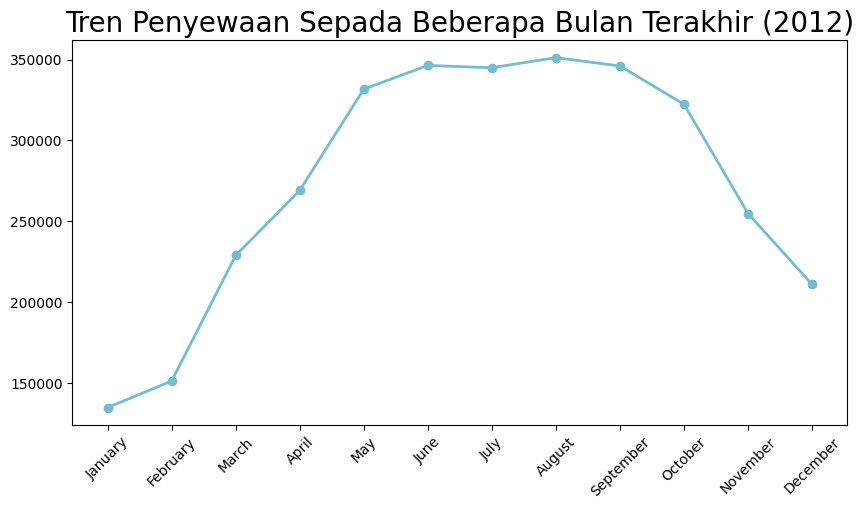

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly["Month"],
    monthly["Total Rentals"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Tren Penyewaan Sepada Beberapa Bulan Terakhir (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

###2. Bagaimana Tren jumlah penyewa sepeda di setiap musim?

In [ ]:
season_trend

,cnt
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


<ipython-input-1473-843c7c5da00e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


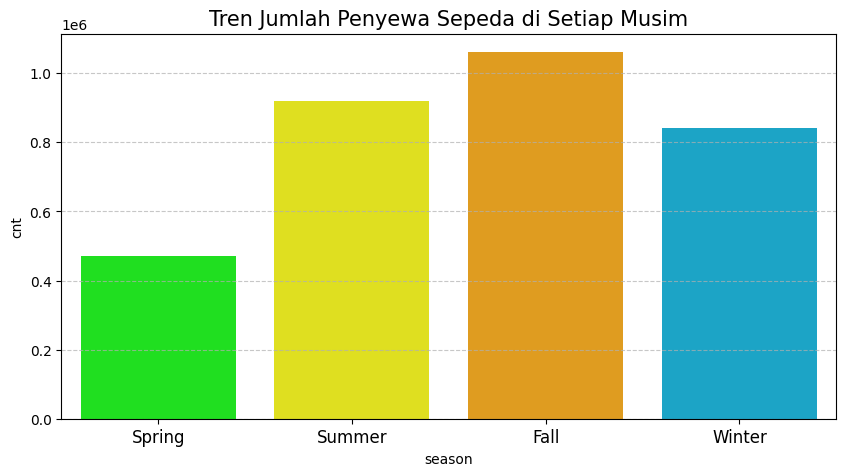

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=season_trend.sort_values(by="cnt", ascending=False),
    palette = ["#00FF00", "#FFFF00","#FFA500", "#00B5E2"]
)
plt.title("Tren Jumlah Penyewa Sepeda di Setiap Musim", loc="center", fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(axis='x', labelsize=12)
plt.show()

###3. Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur di setiap musim?

In [ ]:
workingday_season = day_df.groupby(by=["workingday","season"]).agg({
    "cnt": ["min","max","mean"]
}).reset_index()
workingday_season.columns = ['workingday', 'season', 'min_cnt', 'max_cnt', 'mean_cnt']
workingday_season

<ipython-input-1474-8cb782afbbd6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_season = day_df.groupby(by=["workingday","season"]).agg({


,workingday,season,min_cnt,max_cnt,mean_cnt
0,Weekend,Spring,605,7836,2257.098361
1,Weekend,Summer,795,8294,5142.428571
2,Weekend,Fall,1115,8714,5474.666667
3,Weekend,Winter,627,8555,4606.210526
4,Working day,Spring,431,6312,2780.541667
5,Working day,Summer,1471,8362,4926.664062
6,Working day,Fall,1842,8173,5718.114504
7,Working day,Winter,22,8156,4785.611570


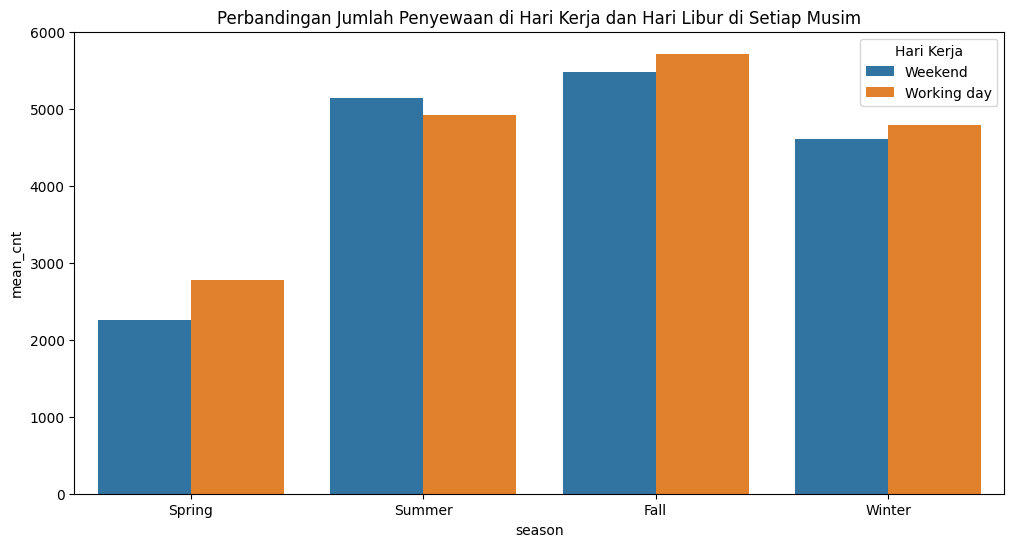

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=workingday_season, x='season', y='mean_cnt', hue='workingday')
plt.title('Perbandingan Jumlah Penyewaan di Hari Kerja dan Hari Libur di Setiap Musim')
plt.legend(title='Hari Kerja')
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi jumlah penyewaan sepeda pada beberapa bulan terakhir(2012), terdapat pola musiman yang jelas dalam tren penyewaan. Dimana penyewaan sepeda cenderung meningkat pada bulan Januari(**134.933 penyewaan**) hingga mencapai puncaknya di bulan Juni(**346.342**) hingga September (**345.991 penyewaan**) lalu menurun secara bertahap hingga Desember(**211.036**).

- Berdasarkan hasil visualisasi penyewaan sepeda di setiap musim, terlihat bahwa jumlah penyewaan sepeda terjadi pada musim gugur, kemudian musim panas, musim dingin dan musim semi. hal ini menunjukkan bahwa penyewa lebih cenderung menyewa sepeda pada musim gugur dan musim panas dibandingkan lainnya. Faktor cuaca mungkin menjadi alasan dibalik tren ini, dimana musim gugur dan musim panas menawarkan kondisi cuaca yang kondusif untuk bersepeda dibandingkan musim dingin atau semi.

- Berdasarkan hasil visualisasi perbandingan penyewaan antara hari kerja dan hari libur di setiap musim. secara umum, jumlah penyewaan pada hari kerja lebih dominan dibandingkan hari libur di setiap musim, kecuali pada musim gugur, dimana jumlah penyewaan dihari libur sedikit lebih tinggi dibandingkan hari kerja. Pada musim panas terdapat selisih yang cukup signifikan antara jumlah penyewaan di hari kerja (**8.362**) dibandingkan hari libur (**8.294**), meskipun perbedaannya kecil. Kemudian pada musim dingin memiliki jumlah penyewaan paling rendah baik di hari kerja maupun di hari libur, yang kemungkinan disebabkan oleh kondisi cuaca yang kurang mendukung untuk aktivitas bersepeda.

## Conclusion

- Conclution pertanyaan 1 : Dari analisis tren penyewaan sepeda terlihat bahwa musim dan cuaca memainkan peran penting dalam layanan ini. Bulan-bulan dengan jumlah penyewaan tertinggi (**Juni-September**) kemungkinan besar disebabkan oleh cuaca yang lebih hangat dan lebih kondusif untuk bersepeda. Sementara itu, jumlah penyewaan yang rendah di bulan-bulan musim dingin seperti **Januari** dan **Desember** dapat dikaitkan dengan kondisi cuaca yang kurang mendukung untuk bersepeda, seperti suhu yang lebih dingin atau hujan/salju.

- Conclution pertanyaan 2 : Musim gugur menjadi periode dengan jumlah penyewaan tertinggi, sedangkan musim semi memiliki penyewaan terendah.Faktor cuaca kemungkinan menjadi penyebab utama di balik tren ini, dengan musim panas dan gugur lebih menarik bagi penyewa dibandingkan musim dingin dan semi.

- Conclution pertanyaan 3 : Hari kerja cenderung memiliki lebih banyak penyewaan dibandingkan hari libur. Pengecualian terjadi pada musim gugur, di mana jumlah penyewaan di hari libur sedikit lebih tinggi dibandingkan hari kerja. Ini bisa disebabkan oleh meningkatnya aktivitas rekreasi di luar ruangan selama musim gugur, yang mendorong orang untuk menyewa sepeda saat liburan.

Saran yang dapat diberikan untuk dari ketiga kesimpulan tersebut yaitu,
- Untuk memaksimalkan pendapatan, perusahaan dapat meningkatkan jumlah sepeda dan layanan perawatan pada bulan-bulan atau musim dengan permintaan tinggi seperti pada musim panas (Mei-Juli) dan gugur (Agustus-Oktober).

- Pada musim dengan penyewaan rendah seperti musim semi dan dingin perusahaan dapat menawarkan promosi, diskon, atau layanan tambahan untuk menarik lebih banyak pelanggan. seperti menyediakan perlengkapan tambahan seperti jaket, sarung tangan, atau alat keselamatan agar bersepeda tetap nyaman di cuaca dingin.

- Mengembangkan program acara atau komunitas bersepeda di hari libur sebagai strategi branding yang kemungkinan dapat menarik lebih banyak pelanggan.
